# Logistic Regression for MNIST

This notebook contains a simple implementation of a multi-label logistic regression classificator. This classificator is used to classify handwritten numbers. 

### Load data

In [1]:
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

print("Example image of digit 1.")
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 
print("We have", len(digits.target), "images.")

Example image of digit 1.


<Figure size 640x480 with 0 Axes>

<Figure size 480x480 with 1 Axes>

We have 1797 images.


Split the data into a test ($20\%$) and train data set and normalize it.

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

from sklearn.preprocessing import normalize
x_train = normalize(x_train, norm='l2')
x_test = normalize(x_test, norm='l2')

Use the `LogisticRegression` of `sklearn` to learn a classificator for the train set. Visualize the error through the confusion matrix and print the accuracy.

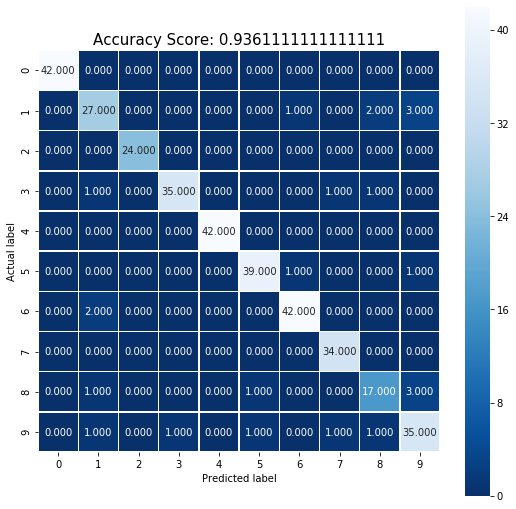

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn

c = 1.0

logistic = LogisticRegression(C=c, solver='lbfgs', multi_class='auto')
logistic.fit(x_train, np.ravel(y_train))

y_pred=logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_sklearn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
seaborn.heatmap(conf_sklearn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

Use crossvalidation to get the best $c\in\{1,\dots 10\}$. Plot `c` through a graphic.

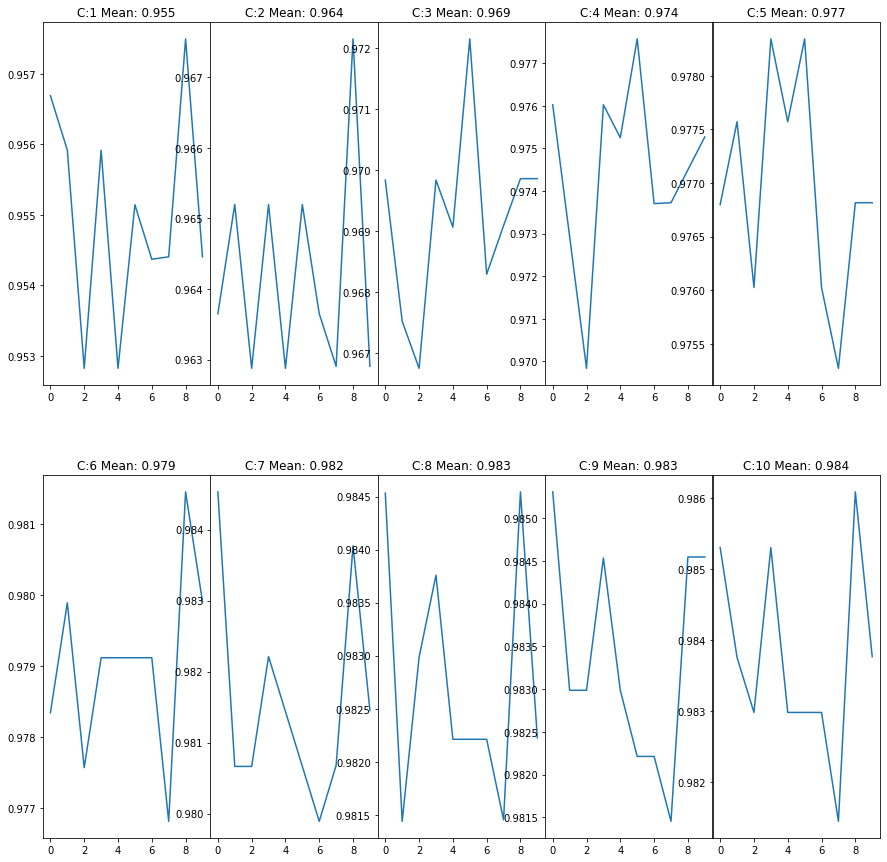

In [7]:
from sklearn.model_selection import KFold
splits = 10

c_degrees=np.arange(1,11)
c_accuracies=np.empty(len(c_degrees))

kf = KFold(n_splits=splits)

fig, axs = plt.subplots(2,5, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()

for i, c in enumerate(c_degrees):
    acc = np.empty(splits)
    lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto', max_iter=2000)
    for k, (train, test) in enumerate(kf.split(x_train, y_train)):
        lr.fit(x_train[train], y_train[train])
        acc[k] = accuracy_score(y_train[train], lr.predict(x_train[train]))
    c_accuracies[i] = acc.mean()
    axs[i].set_title("C:" + str(c) + " Mean: " + str(np.round(c_accuracies[i], 3)))
    axs[i].plot(acc)


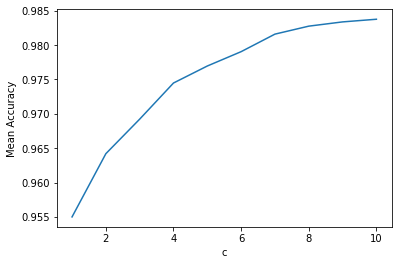

In [8]:
plt.plot(c_degrees, c_accuracies)
plt.ylabel('Mean Accuracy')
plt.xlabel('c')
plt.show()